In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline

## Exercise: More Business Cycle Data

The file `business_cycle_data_actual_trend.csv`, available at https://raw.githubusercontent.com/letsgoexploring/economic-data/master/business-cycle-data/csv/business_cycle_data_actual_trend.csv, contains actual and trend data for real GDP per capita, real consumption per capita, real investment per capita, real physical capital per capita, TFP,  hours per capita, real M2 per capita, the rate of PCE (personal consumption expenditures) inflation, the three month T-bill rate, and the unemployment rate at quarterly frequency. The GDP, consumption, investment, capital, and M2 data are in terms of 2012 dollars. Hours is measured as an index with the value in October 2012 set to 100. PCE inflation is measured at the percent change from one year prior. PCE inflation, unemployment, and the T-bill rate are expressed in units of percent.

In this Notebook, you will replicate the work from class 9 but for the following quantities:
* Real GDP per capita
* 3-month T-Bill rate
* PCE inflation rate
* Unemployment rate

Refer to the Notebook from Class 9 for reference.

## Part (a): Preliminaries

In [7]:
# Read business_cycle_data_actual_trend.csv into a Pandas DataFrame with the first column set as the index and parse_dates=True
df=pd.read_csv('https://raw.githubusercontent.com/letsgoexploring/economic-data/master/business-cycle-data/csv/business_cycle_data_actual_trend.csv',index_col=0,parse_dates=True)
# Print the last five rows of the data
df.tail(5)

,gdp,gdp_trend,consumption,consumption_trend,investment,investment_trend,hours,hours_trend,capital,capital_trend,tfp,tfp_trend,real_m2,real_m2_trend,t_bill_3mo,t_bill_3mo_trend,pce_inflation,pce_inflation_trend,unemployment,unemployment_trend
date,,,,,,,,,,,,,,,,,,,,
2021-01-01,73.031372,73.365081,49.725788,49.854446,13.016749,13.154819,101.052642,102.284375,86.290710,86.302390,27.110051,27.019023,64.997630,61.626995,0.000500,0.007198,0.018304,0.030236,0.062000,0.052661
2021-04-01,74.146585,73.565976,51.129965,50.028147,12.797634,13.222240,102.195800,102.189905,86.678387,86.682322,27.280678,27.067640,66.282534,62.912486,0.000267,0.006450,0.038614,0.032410,0.059000,0.052844
2021-07-01,74.456430,73.771212,51.231561,50.205809,13.155543,13.292507,103.578534,102.104444,86.963566,87.063384,27.125208,27.116257,66.815435,64.228034,0.000467,0.005704,0.042778,0.034657,0.051000,0.052942
2021-10-01,75.589406,73.978938,51.376506,50.385718,14.256950,13.364702,104.054745,102.023967,87.325161,87.445824,27.416133,27.164847,67.149427,65.571894,0.000533,0.004964,0.054973,0.036945,0.042333,0.052983
2022-01-01,74.931085,74.187711,51.378527,50.566776,14.279095,13.437799,104.911336,101.945381,87.652484,87.829834,26.997543,27.213388,66.804052,66.943785,0.003067,0.004229,0.062865,0.039247,0.038000,0.052993


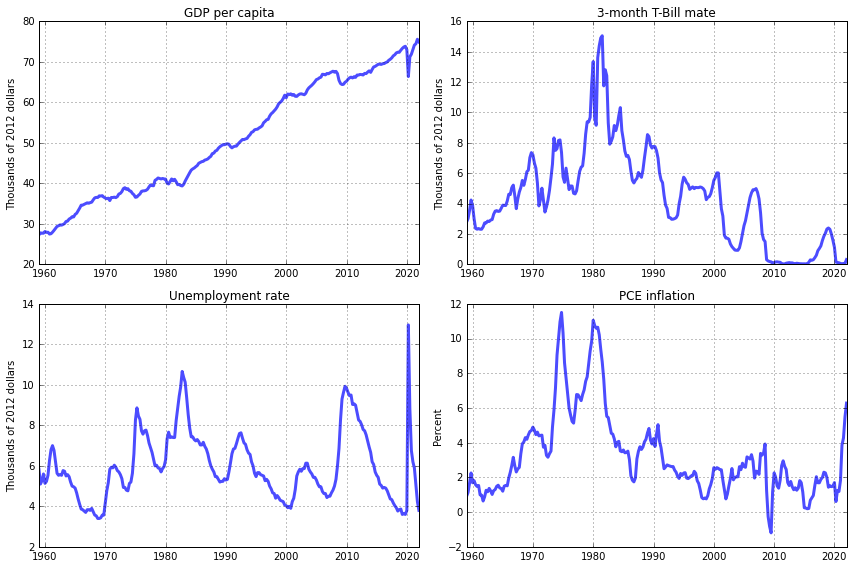

In [4]:
# CELL PROVIDED 
# Construct a 2x2 grid of plots of GDP, consumption, t_bill_3mo, unemployment, and pce_inflation. Multiply
# t_bill_3mo, unemployment, and pce_inflation by 100 inside the plot command to plot in units of percent.
base_year = '2012'
fig = plt.figure(figsize=(12,8))

ax1 = fig.add_subplot(2,2,1)
ax1.plot(df.gdp,'-',lw=3,alpha = 0.7)
ax1.grid()
ax1.set_title('GDP per capita')
ax1.set_ylabel('Thousands of '+base_year+' dollars')

ax2 = fig.add_subplot(2,2,2)
ax2.plot(df.t_bill_3mo*100,'-',lw=3,alpha = 0.7)
ax2.grid()
ax2.set_title('3-month T-Bill mate')
ax2.set_ylabel('Thousands of '+base_year+' dollars')

ax3 = fig.add_subplot(2,2,3)
ax3.plot(df.unemployment*100,'-',lw=3,alpha = 0.7)
ax3.grid()
ax3.set_title('Unemployment rate')
ax3.set_ylabel('Thousands of '+base_year+' dollars')

ax4 = fig.add_subplot(2,2,4)
ax4.plot(df.pce_inflation*100,'-',lw=3,alpha = 0.7)
ax4.grid()
ax4.set_title('PCE inflation')
ax4.set_ylabel('Percent')

fig.tight_layout()

## Part (b): Cycles and Trends

Recalle: A time series $X_t$ can be decomposed into a trend component $X_t^{trend}$ and a cyclical component $X_t^{cycle}$ such that:

\begin{align}
X_t & = X_t^{trend} + X_t^{cycle}. \tag{1}
\end{align}

In equation (1), $X_t^{trend}$ is the long-run value about which $X_t$ fluctuates. $X^{cycle}_t$ is the amount by which $X_t$ excedes its trend.

Often times, it's useful to express the cyclical component of a time series as the difference between the (natural) log of the series and the log of the trend:

\begin{align}
\hat{x}_t & = \log\left(X_t\right) - \log\left(X_t^{trend}\right) \approx\frac{X_t-X_t^{trend}}{X_t^{trend}}
\end{align} 

The log-deviation from trend is approximately equal to the percent deviation of the series from trend (divided by 100).

### GDP

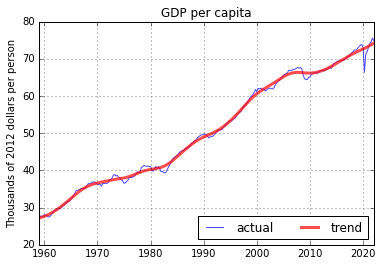

In [38]:
# CELL PROVIDED
# Construct a plot of real GDP with its trend with:
#    1. Actual line: blue with lw=1, alpha=0.7, label = 'actual'
#    2. Trend line:  red with lw=3, alpha=0.7, label = 'trend'
#    3. A legend in an appropriate place
plt.plot(df.gdp,'-',lw=1,alpha = 0.7,label='actual')
plt.plot(df.gdp_trend,'r-',lw=3,alpha = 0.7,label='trend')
plt.grid()
plt.ylabel('Thousands of '+base_year+' dollars per person')
plt.title('GDP per capita')
plt.legend(loc='lower right',ncol=2)

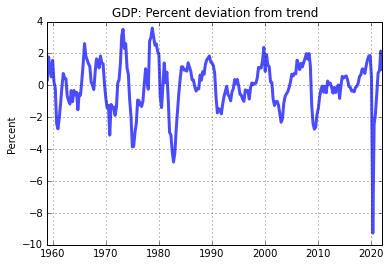

In [39]:
# CELL PROVIDED
# Create a new column called gdp_cycle equal to the log difference between actual GDP and trend GDP:
df['gdp_cycle'] = np.log(df['gdp']) - np.log(df['gdp_trend'])

# Plot the log deviation of GDP from its trend (times 100)
plt.plot(df.gdp_cycle*100,'b-',lw=3,alpha = 0.7)
plt.ylabel('Percent')
plt.title('GDP: Percent deviation from trend')
plt.grid()

### 3-month T-bill rate

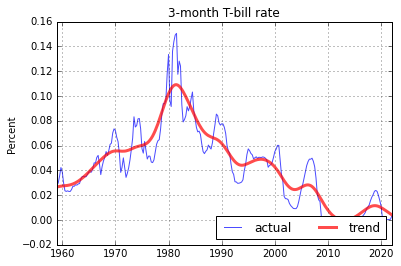

In [51]:
# Construct a plot of the 3-month T-bill rate (times 100) with its trend with:
#    1. Actual line: blue with lw=1, alpha=0.7, label = 'actual'
#    2. Trend line:  red with lw=3, alpha=0.7, label = 'trend'
#    3. A legend in an appropriate place
plt.plot(df.t_bill_3mo,'-',lw=1,alpha = 0.7,label='actual')
plt.plot(df.t_bill_3mo_trend,'r-',lw=3,alpha = 0.7,label='trend')
plt.grid()
plt.ylabel('Percent')
plt.title('3-month T-bill rate')
plt.legend(loc='lower right',ncol=2)

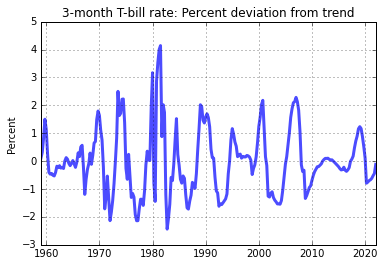

In [50]:
# Create a new column called t_bill_3mo_cycle equal to the DIFFERENCE (not log difference!) between actual 
# 3-month T-bill rate and it's trend:
df['t_bill_3mo_cycle'] = df['t_bill_3mo'] - df['t_bill_3mo_trend']

# Plot the deviation of the 3-month T-bill rate from its trend (times 100)
plt.plot(df.t_bill_3mo_cycle*100,'b-',lw=3,alpha = 0.7)
plt.ylabel('Percent')
plt.title('3-month T-bill rate: Percent deviation from trend')
plt.grid()

### Unemployment rate

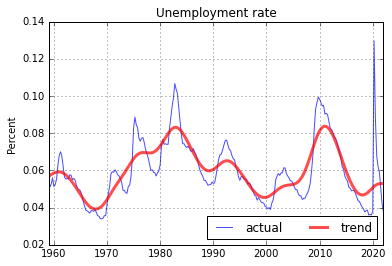

In [49]:
# Construct a plot of the unemployment rate (times 100) with its trend with:
#    1. Actual line: blue with lw=1, alpha=0.7, label = 'actual'
#    2. Trend line:  red with lw=3, alpha=0.7, label = 'trend'
#    3. A legend in an appropriate place

plt.plot(df.unemployment,'-',lw=1,alpha = 0.7,label='actual')
plt.plot(df.unemployment_trend,'r-',lw=3,alpha = 0.7,label='trend')
plt.grid()
plt.ylabel('Percent')
plt.title('Unemployment rate')
plt.legend(loc='lower right',ncol=2)


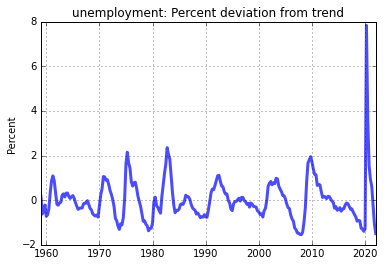

In [47]:
# Create a new column called unemployment_cycle equal to the DIFFERENCE (not log difference!) between actual 
# unemployment and it's trend:

df['unemployment_cycle'] = df['unemployment']- df['unemployment_trend']


# Plot the deviation of the unemployment rate from its trend (times 100)
plt.plot(df.unemployment_cycle*100,'b-',lw=3,alpha = 0.7)
plt.ylabel('Percent')
plt.title('unemployment: Percent deviation from trend')
plt.grid()

### PCE Inflation -Personal Consumption expenditure inflation

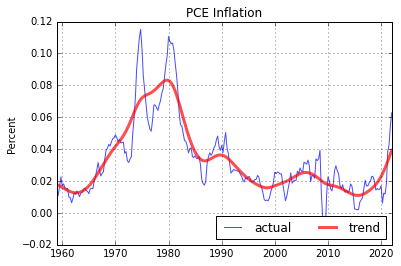

In [46]:
# Construct a plot of the pce_inflation rate (times 100) with its trend with:
#    1. Actual line: blue with lw=1, alpha=0.7, label = 'actual'
#    2. Trend line:  red with lw=3, alpha=0.7, label = 'trend'
#    3. A legend in an appropriate place
plt.plot(df.pce_inflation,'-',lw=1,alpha = 0.7,label='actual')
plt.plot(df.pce_inflation_trend,'r-',lw=3,alpha = 0.7,label='trend')
plt.grid()
plt.ylabel('Percent')
plt.title('PCE Inflation')
plt.legend(loc='lower right',ncol=2)

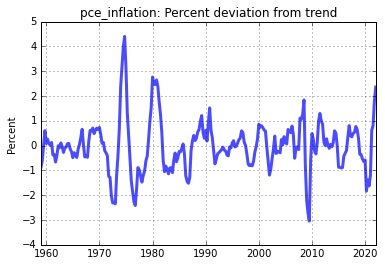

In [36]:
# Create a new column called pce_inflation_cycle equal to the DIFFERENCE (not log difference!) between actual 
# pce_inflation and it's trend:
df['pce_inflation_cycle'] = df['pce_inflation'] - df['pce_inflation_trend']


# Plot the deviation of the PCE inflation rate from its trend (times 100)
plt.plot(df.pce_inflation_cycle*100,'b-',lw=3,alpha = 0.7)
plt.ylabel('Percent')
plt.title('pce_inflation: Percent deviation from trend')
plt.grid()

## Part (c): Statistics

In [41]:
# Create a new variable called df_cycle that is a DataFrame with columns columns gdp_cycle, t_bill_3mo_cycle, 
# pce_inflation_cycle, unemployment_cycle from df.
df_cycle=df[['gdp_cycle','t_bill_3mo_cycle','pce_inflation_cycle','unemployment_cycle']]

# Print the first five rows of df_cycle
df_cycle.head()

,gdp_cycle,t_bill_3mo_cycle,pce_inflation_cycle,unemployment_cycle
date,,,,
1959-01-01,0.003473,0.001081,-0.008779,0.001707
1959-04-01,0.017825,0.003105,-0.006134,-0.006223
1959-07-01,0.010436,0.008295,-0.000315,-0.005078
1959-10-01,0.005315,0.015022,0.006050,-0.002192
1960-01-01,0.015735,0.011318,0.000900,-0.007232


In [43]:
# Use the DataFrame method .mean() to find the average values of the gdp_cycle, t_bill_3mo_cycle, 
# pce_inflation_cycle, unemployment_cycle columns
df_cycle.mean()

gdp_cycle              0.000039
t_bill_3mo_cycle       0.000019
pce_inflation_cycle   -0.000101
unemployment_cycle     0.000032
dtype: float64

In [44]:
# Use the DataFrame method .std() to find the standard deviations of the gdp_cycle, t_bill_3mo_cycle, 
# pce_inflation_cycle, unemployment_cycle columns
df_cycle.std()

gdp_cycle              0.015460
t_bill_3mo_cycle       0.011473
pce_inflation_cycle    0.010283
unemployment_cycle     0.009338
dtype: float64

In [45]:
# Use the DataFrame method .corr() to find the coeficients of correlation among the gdp_cycle, t_bill_3mo_cycle, 
# pce_inflation_cycle, unemployment_cycle columns
df_cycle.corr()

,gdp_cycle,t_bill_3mo_cycle,pce_inflation_cycle,unemployment_cycle
gdp_cycle,1.000000,0.398524,0.192832,-0.854449
t_bill_3mo_cycle,0.398524,1.000000,0.542232,-0.487220
pce_inflation_cycle,0.192832,0.542232,1.000000,-0.339292
unemployment_cycle,-0.854449,-0.487220,-0.339292,1.000000


**Questions**

1. Of the three quantities besides GDP in the columns of `df_cycle`, which varies the most over the business cycle?
2. Of the three quantities besides GDP in the columns of `df_cycle`, which varies the least over the business cycle?
3. Of the three quantities besides GDP in the columns of `df_cycle`, which is most correlated (in absolute value) with GDP over the business cycle?

**Answers**

1.  gdp_cycle

2.  unemployment_cycle

3.  t_bill_3mo_cycle

## Part (d): Bonus

Do the next cell for fun. You won't get extra credit, but do it if you want to and have time.

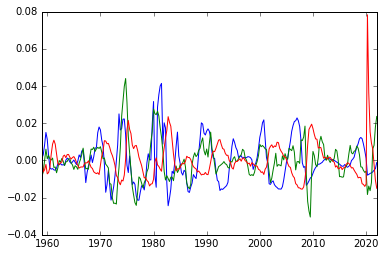

In [55]:
# Plot the cyclical components of GDP, three month T-bill rate, PCE inflation rate, and the unemployment rate
# (all times 100) on the same set of axes

plt.plot(df.t_bill_3mo_cycle)
plt.plot(df.pce_inflation_cycle)
plt.plot(df.unemployment_cycle)